In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

In [0]:
vhcl=pd.read_csv('vehicle_pca.csv')

In [0]:
vhcl.head()

compactness  circularity  ...  hollows_ratio  class
0           95         48.0  ...            197    van
1           91         41.0  ...            199    van
2          104         50.0  ...            196    car
3           93         41.0  ...            207    van
4           85         44.0  ...            183    bus

[5 rows x 19 columns]

In [0]:
vhcl[vhcl.notnull()]

compactness  circularity  ...  hollows_ratio  class
0             95         48.0  ...            197    van
1             91         41.0  ...            199    van
2            104         50.0  ...            196    car
3             93         41.0  ...            207    van
4             85         44.0  ...            183    bus
5            107          NaN  ...            183    bus
6             97         43.0  ...            204    bus
7             90         43.0  ...            202    van
8             86         34.0  ...            208    van
9             93         44.0  ...            204    car
10            86         36.0  ...            202    van
11            90         34.0  ...            202    car
12            88         46.0  ...            195    bus
13            89         42.0  ...            197    van
14            94         49.0  ...            199    bus
15            96         55.0  ...            194    car
16            89         36.0  ...            185    van
17            99         41.0  ...            199    bus
18           104         54.0  ...            195    car
19           101         56.0  ...            193    car
20            84         47.0  ...            192    bus
21            84         37.0  ...            183    van
22            94         43.0  ...            206    bus
23            87         39.0  ...            199    bus
24            99         53.0  ...            201    car
25            85         45.0  ...            199    van
26            83         36.0  ...            183    car
27           107         54.0  ...            199    car
28           102         45.0  ...            193    bus
29            80         38.0  ...            185    car
..           ...          ...  ...            ...    ...
816           90         48.0  ...            195    van
817          104         53.0  ...            203    car
818           95         43.0  ...            197    car
819           93         42.0  ...            197    car
820           87         38.0  ...            186    car
821          104         56.0  ...            195    car
822           95         41.0  ...            207    van
823          105         54.0  ...            198    car
824          106         55.0  ...            196    car
825           86         39.0  ...            190    car
826           95         49.0  ...            206    car
827           99         57.0  ...            198    car
828           89         42.0  ...            191    van
829           95         49.0  ...            191    van
830           97         37.0  ...            208    bus
831          100         47.0  ...            205    bus
832          108         49.0  ...            199    car
833           92         46.0  ...            191    car
834           82         36.0  ...            182    car
835          111         58.0  ...            183    bus
836           87         45.0  ...            196    van
837           94         46.0  ...            199    car
838           95         43.0  ...            200    van
839           90         44.0  ...            203    van
840           93         34.0  ...            207    car
841           93         39.0  ...            195    car
842           89         46.0  ...            197    van
843          106         54.0  ...            201    car
844           86         36.0  ...            195    car
845           85         36.0  ...            190    van

[846 rows x 19 columns]

In [0]:
  vhcl.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [0]:
# Only three columns  in our dataset does-not contain null value apart from these three columns all the columns have the count of less than 846.



In [0]:
# Furhter verifying the same using the Describe function (). 

vhcl.describe().transpose()

count        mean  ...    75%     max
compactness                  846.0   93.678487  ...  100.0   119.0
circularity                  841.0   44.828775  ...   49.0    59.0
distance_circularity         842.0   82.110451  ...   98.0   112.0
radius_ratio                 840.0  168.888095  ...  195.0   333.0
pr.axis_aspect_ratio         844.0   61.678910  ...   65.0   138.0
max.length_aspect_ratio      846.0    8.567376  ...   10.0    55.0
scatter_ratio                845.0  168.901775  ...  198.0   265.0
elongatedness                845.0   40.933728  ...   46.0    61.0
pr.axis_rectangularity       843.0   20.582444  ...   23.0    29.0
max.length_rectangularity    846.0  147.998818  ...  159.0   188.0
scaled_variance              843.0  188.631079  ...  217.0   320.0
scaled_variance.1            844.0  439.494076  ...  587.0  1018.0
scaled_radius_of_gyration    844.0  174.709716  ...  198.0   268.0
scaled_radius_of_gyration.1  842.0   72.447743  ...   75.0   135.0
skewness_about               840.0    6.364286  ...    9.0    22.0
skewness_about.1             845.0   12.602367  ...   19.0    41.0
skewness_about.2             845.0  188.919527  ...  193.0   206.0
hollows_ratio                846.0  195.632388  ...  201.0   211.0

[18 rows x 8 columns]

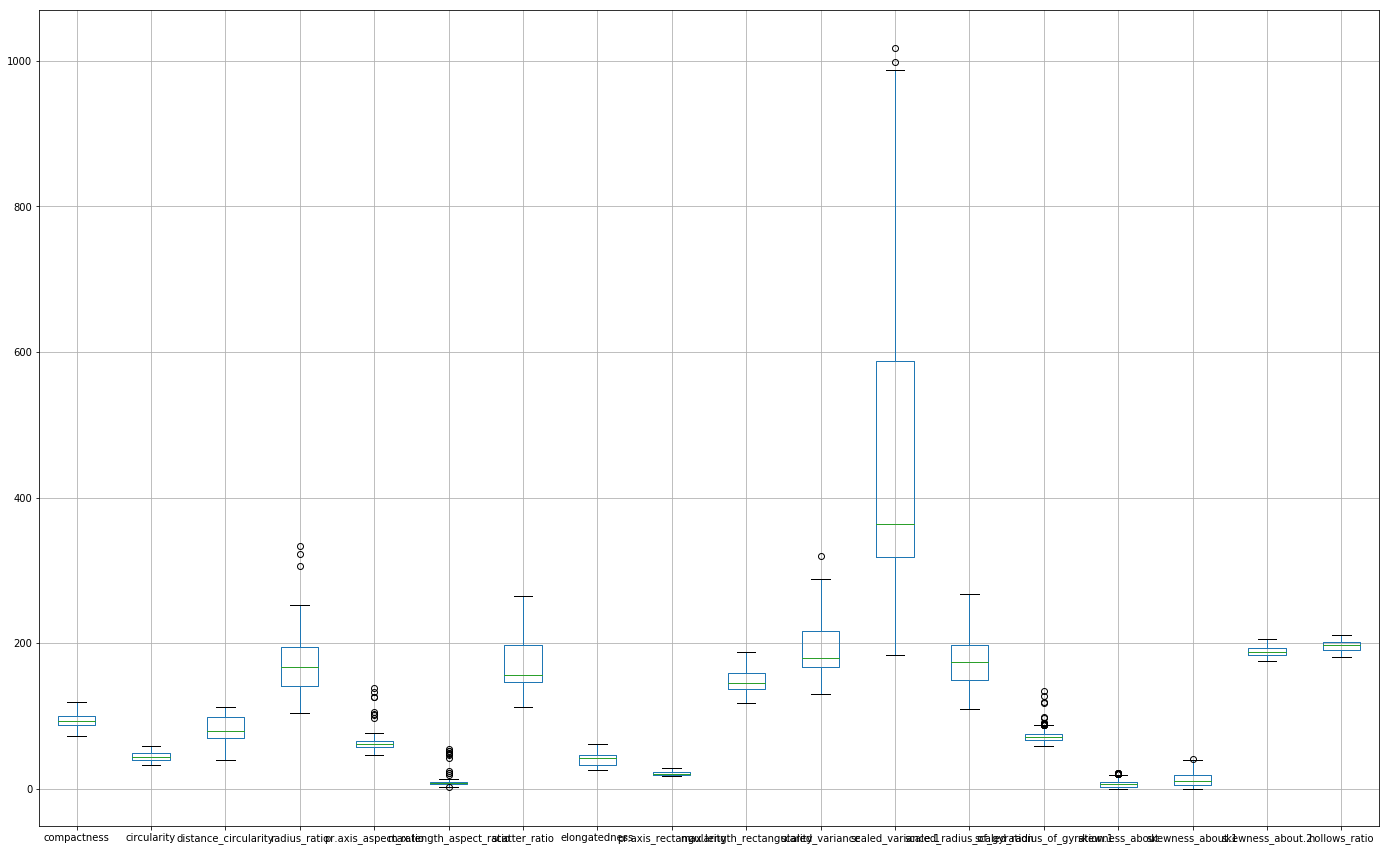

In [0]:
vhcl.boxplot(figsize=(24,15))

In [0]:
  vhcl_df = vhcl.drop('class',axis = 1)
  vhcl_target = vhcl.pop('class')

In [0]:
vhcl_df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
dtype: int64

In [0]:
vhcl_df.mean()

compactness                     93.678487
circularity                     44.828775
distance_circularity            82.110451
radius_ratio                   168.888095
pr.axis_aspect_ratio            61.678910
max.length_aspect_ratio          8.567376
scatter_ratio                  168.901775
elongatedness                   40.933728
pr.axis_rectangularity          20.582444
max.length_rectangularity      147.998818
scaled_variance                188.631079
scaled_variance.1              439.494076
scaled_radius_of_gyration      174.709716
scaled_radius_of_gyration.1     72.447743
skewness_about                   6.364286
skewness_about.1                12.602367
skewness_about.2               188.919527
hollows_ratio                  195.632388
dtype: float64

In [0]:
vhcl_df.median()

compactness                     93.0
circularity                     44.0
distance_circularity            80.0
radius_ratio                   167.0
pr.axis_aspect_ratio            61.0
max.length_aspect_ratio          8.0
scatter_ratio                  157.0
elongatedness                   43.0
pr.axis_rectangularity          20.0
max.length_rectangularity      146.0
scaled_variance                179.0
scaled_variance.1              363.5
scaled_radius_of_gyration      173.5
scaled_radius_of_gyration.1     71.5
skewness_about                   6.0
skewness_about.1                11.0
skewness_about.2               188.0
hollows_ratio                  197.0
dtype: float64

In [0]:
vhcl_df =vhcl_df.fillna(vhcl_df.median())

            

In [0]:
vhcl_df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
dtype: int64

In [0]:
from scipy.stats import zscore

In [0]:
vhclz_df=vhcl_df.apply(zscore)

In [0]:
vhclz_df.head()

compactness  circularity  ...  skewness_about.2  hollows_ratio
0     0.160580     0.518073  ...         -0.312012       0.183957
1    -0.325470    -0.623732  ...          0.013265       0.452977
2     1.254193     0.844303  ...         -0.149374       0.049447
3    -0.082445    -0.623732  ...          1.639649       1.529056
4    -1.054545    -0.134387  ...         -1.450481      -1.699181

[5 rows x 18 columns]

In [0]:
vhcl_df = vhclz_df.join(vhcl_target)

In [0]:
vhcl_df.head()

compactness  circularity  ...  hollows_ratio  class
0     0.160580     0.518073  ...       0.183957    van
1    -0.325470    -0.623732  ...       0.452977    van
2     1.254193     0.844303  ...       0.049447    car
3    -0.082445    -0.623732  ...       1.529056    van
4    -1.054545    -0.134387  ...      -1.699181    bus

[5 rows x 19 columns]

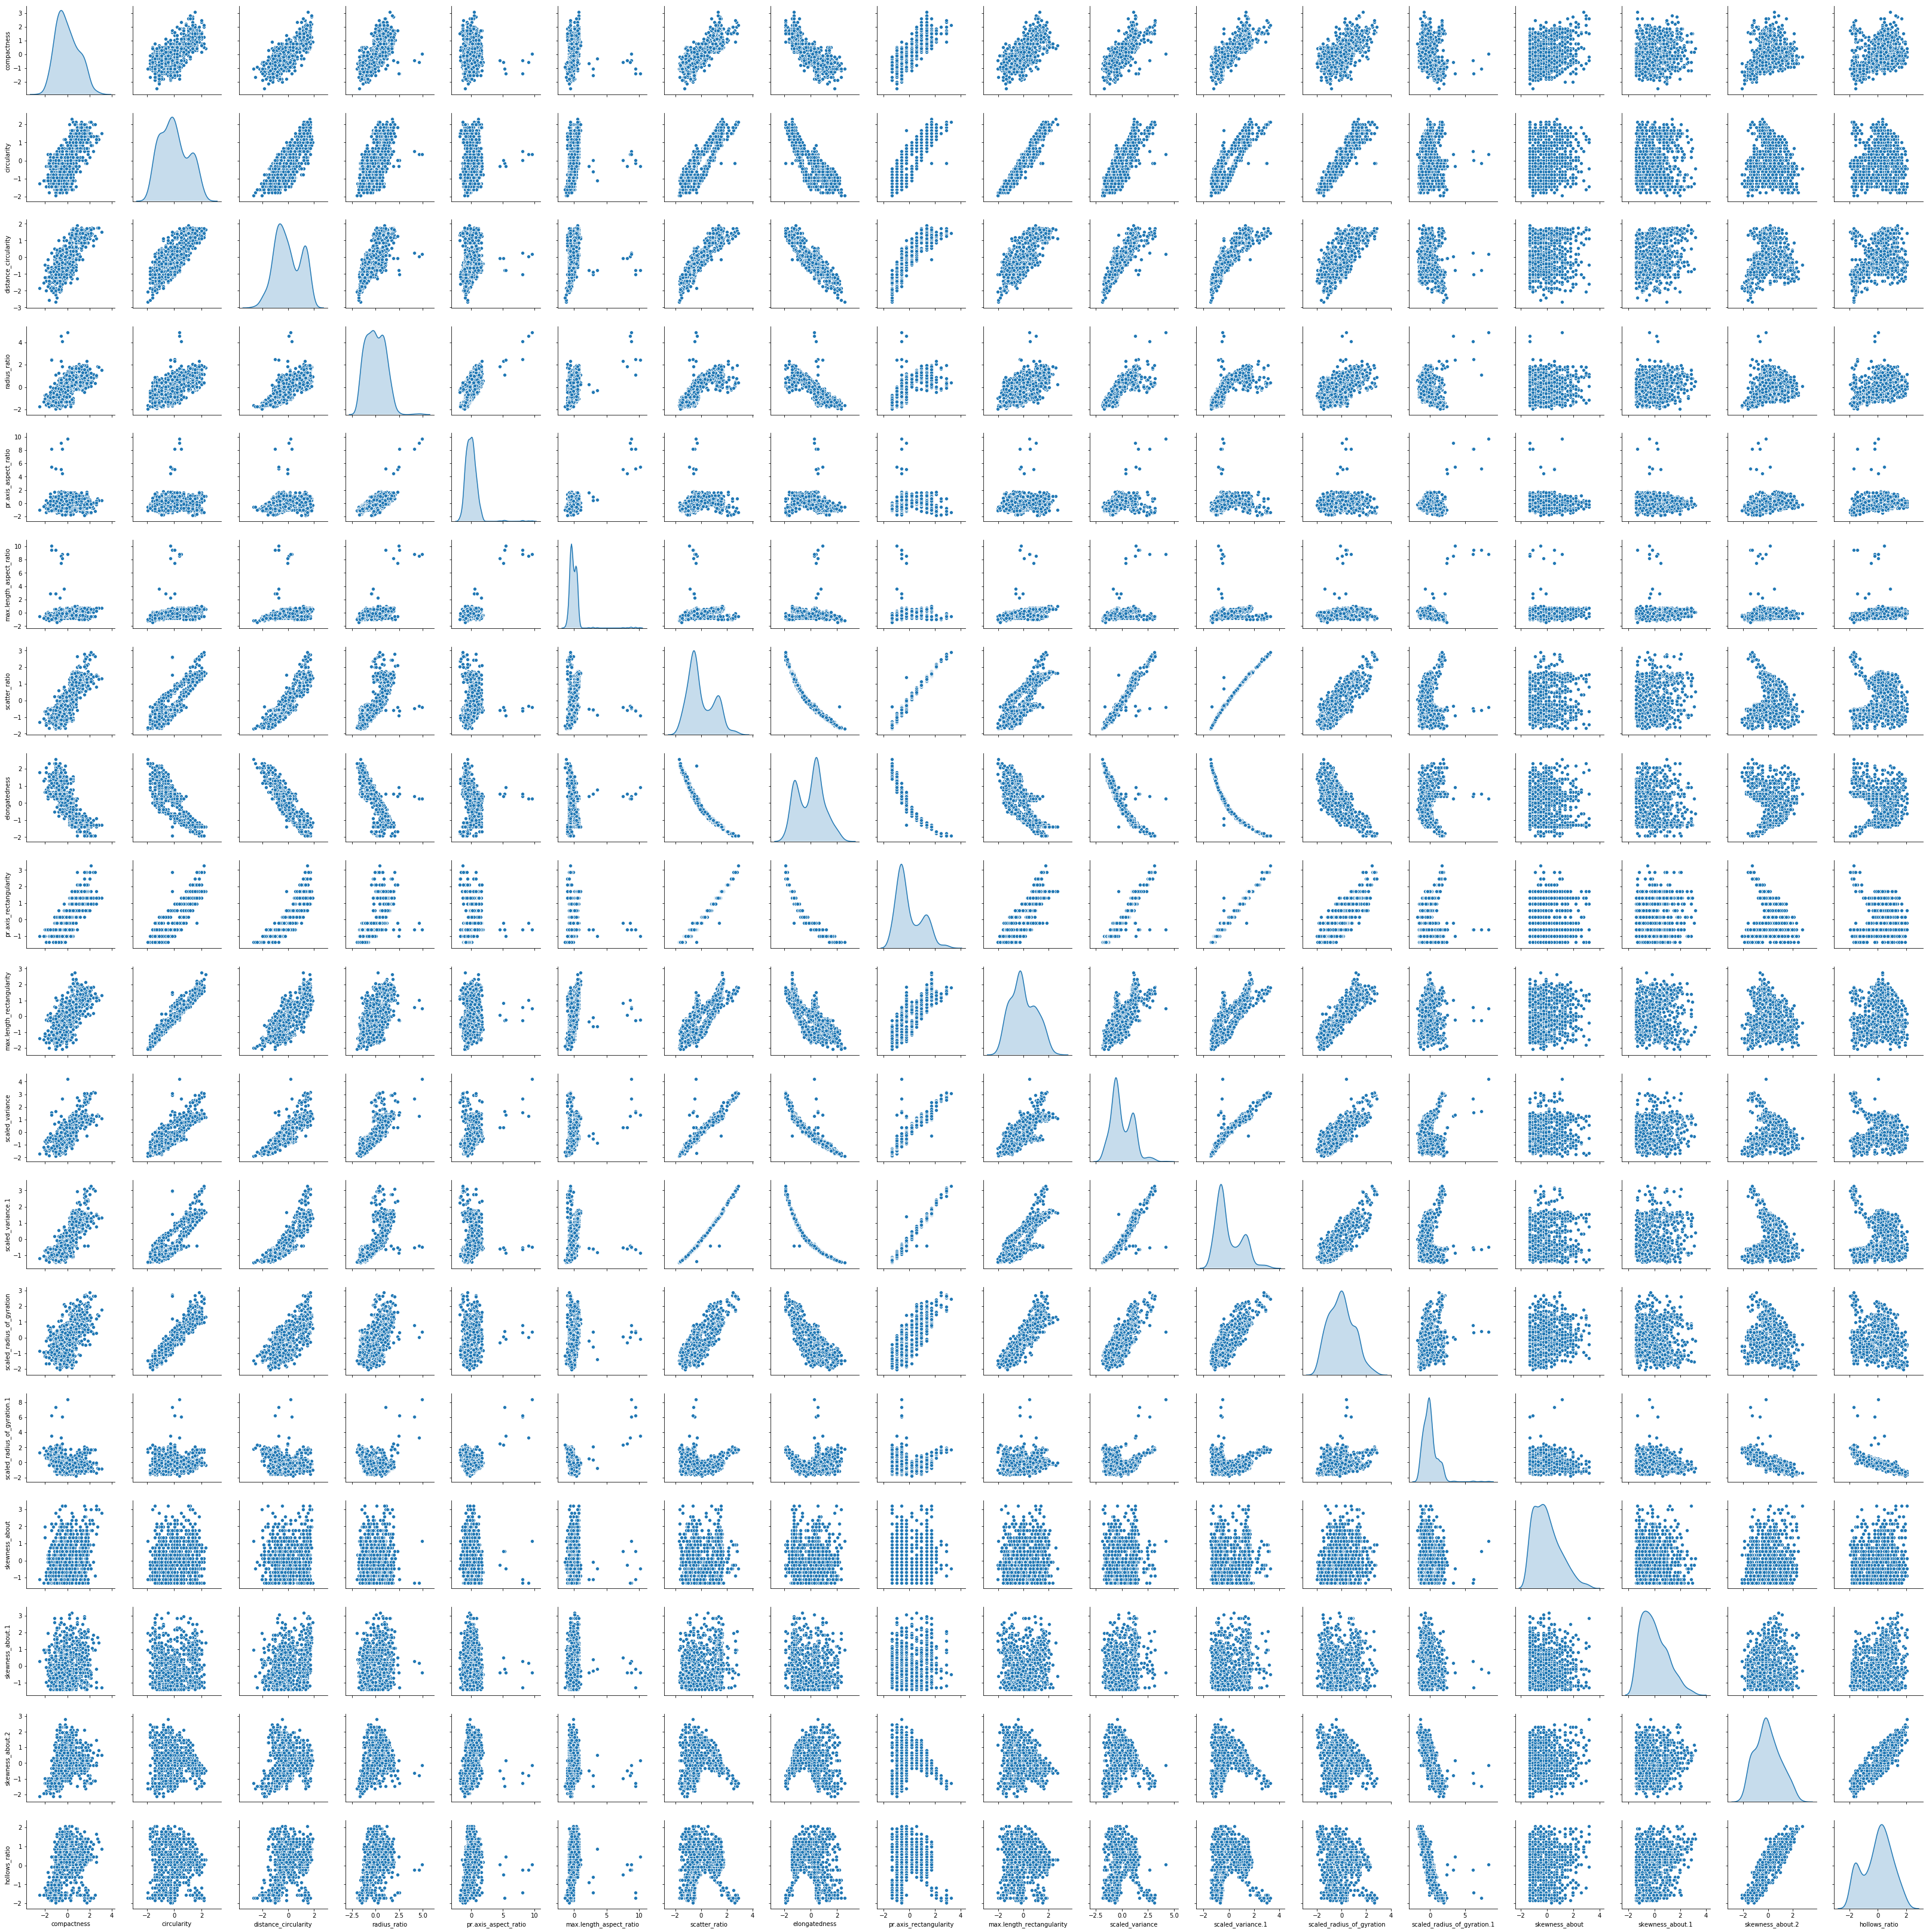

In [0]:
sns.pairplot(vhclz_df,diag_kind='kde')

In [0]:
## IN most of the Data we see that there are 3 peaks but we also see that there are 3-4 peaks all around 
vhclz_df.corr()


compactness  ...  hollows_ratio
compactness                     1.000000  ...       0.365552
circularity                     0.684887  ...       0.046351
distance_circularity            0.789928  ...       0.332732
radius_ratio                    0.689743  ...       0.471309
pr.axis_aspect_ratio            0.091534  ...       0.267725
max.length_aspect_ratio         0.148249  ...       0.143919
scatter_ratio                   0.812620  ...       0.118817
elongatedness                  -0.788750  ...      -0.216905
pr.axis_rectangularity          0.813694  ...       0.099286
max.length_rectangularity       0.676143  ...       0.076770
scaled_variance                 0.762070  ...       0.085695
scaled_variance.1               0.814012  ...       0.102935
scaled_radius_of_gyration       0.585243  ...      -0.118002
scaled_radius_of_gyration.1    -0.249593  ...      -0.802123
skewness_about                  0.236078  ...       0.097126
skewness_about.1                0.157015  ...       0.204990
skewness_about.2                0.298537  ...       0.892581
hollows_ratio                   0.365552  ...       1.000000

[18 rows x 18 columns]

Text(0.5, 1.0, 'Selecting k with elbow method')

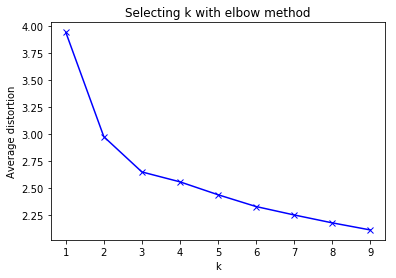

In [0]:
# Using corr we can check what all values are actually which shows high correlation. 
#Scattered ratio is very much realted with the scaled variance we see that from the realtion

from scipy.spatial.distance import cdist
clusters = range(1,10)
meanDistortions = []

for k in clusters:
    model= KMeans(n_clusters=k)
    model.fit(vhclz_df)
    prediction= model.predict(vhclz_df)
    meanDistortions.append(sum(np.min(cdist(vhclz_df,model.cluster_centers_,'euclidean'),axis =1))/vhclz_df.shape[0])
    
plt.plot(clusters,meanDistortions,'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with elbow method')

In [0]:
#STarting with k = 2 
final_model = KMeans(2)
final_model.fit(vhclz_df)
prediction= final_model.predict(vhclz_df)
vhcl_df['GROUP']= prediction

print ("group assigned :\n")

vhcl_df[['hollows_ratio','class','GROUP']]
# Append the prediction in the main data frame  

group assigned :



hollows_ratio class  GROUP
0         0.183957   van      0
1         0.452977   van      0
2         0.049447   car      1
3         1.529056   van      0
4        -1.699181   bus      0
5        -1.699181   bus      1
6         1.125526   bus      0
7         0.856507   van      0
8         1.663566   van      0
9         1.125526   car      1
10        0.856507   van      0
11        0.856507   car      0
12       -0.085062   bus      0
13        0.183957   van      0
14        0.452977   bus      1
15       -0.219572   car      1
16       -1.430161   van      0
17        0.452977   bus      0
18       -0.085062   car      1
19       -0.354082   car      1
20       -0.488592   bus      0
21       -1.699181   van      0
22        1.394546   bus      0
23        0.452977   bus      0
24        0.721997   car      1
25        0.452977   van      0
26       -1.699181   car      0
27        0.452977   car      1
28       -0.354082   bus      1
29       -1.430161   car      0
..             ...   ...    ...
816      -0.085062   van      0
817       0.991016   car      1
818       0.183957   car      1
819       0.183957   car      1
820      -1.295651   car      0
821      -0.085062   car      1
822       1.529056   van      0
823       0.318467   car      1
824       0.049447   car      1
825      -0.757612   car      0
826       1.394546   car      1
827       0.318467   car      1
828      -0.623102   van      0
829      -0.623102   van      0
830       1.663566   bus      0
831       1.260036   bus      0
832       0.452977   car      1
833      -0.623102   car      0
834      -1.833690   car      0
835      -1.699181   bus      1
836       0.049447   van      0
837       0.452977   car      0
838       0.587487   van      0
839       0.991016   van      0
840       1.529056   car      0
841      -0.085062   car      0
842       0.183957   van      0
843       0.721997   car      1
844      -0.085062   car      0
845      -0.757612   van      0

[846 rows x 3 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9531862eb8>,
      dtype=object)

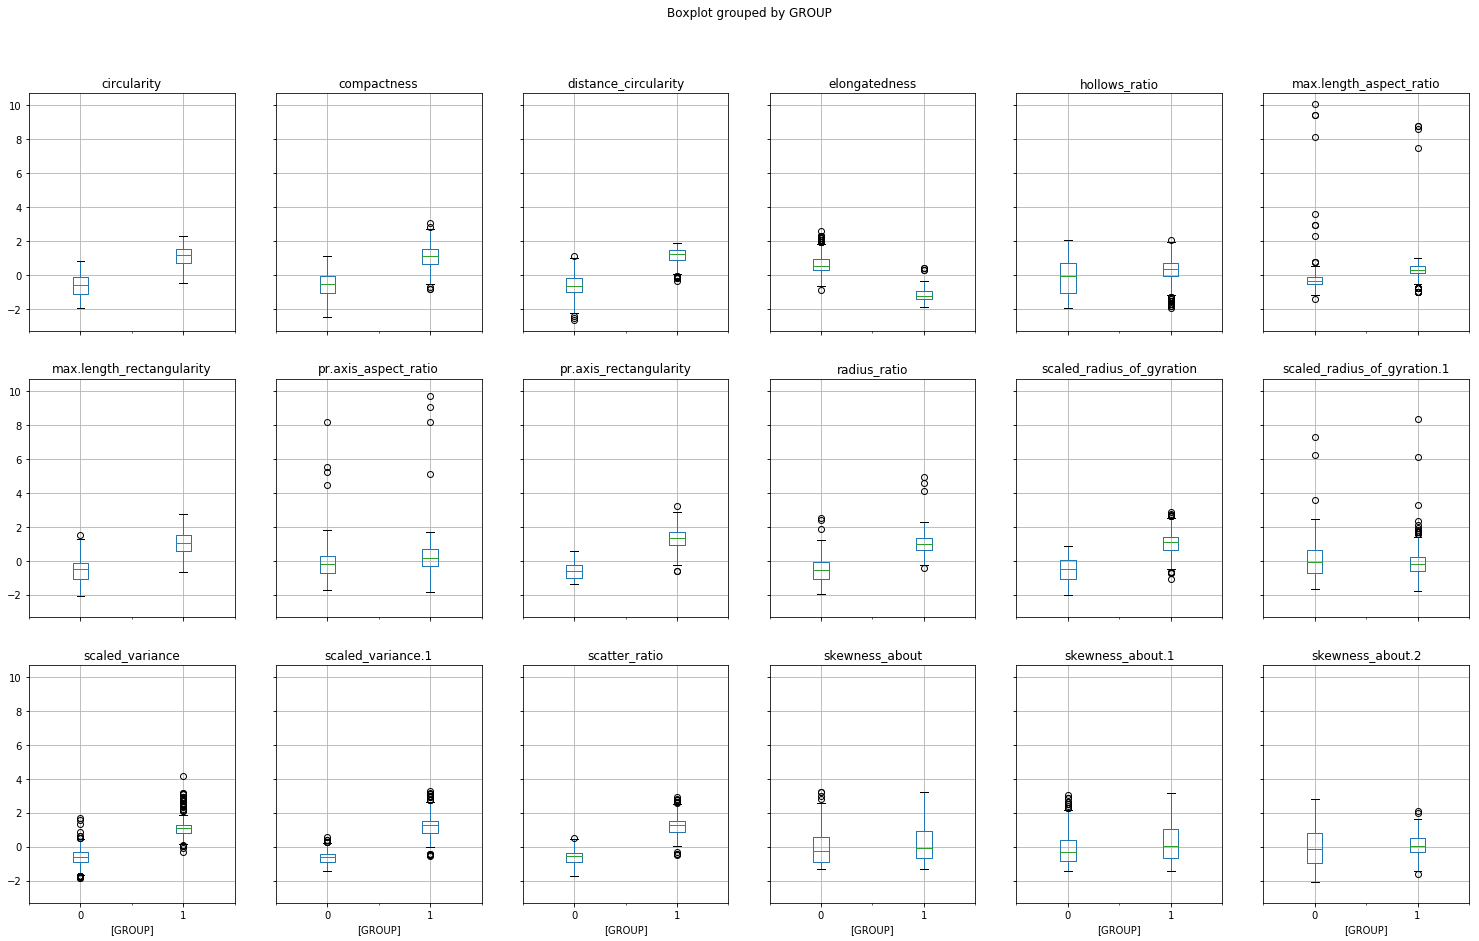

In [0]:
## Now using the box plot to get more information about the data here , Let's prepare the box plot when the numner of groups we are seeing as 0 and 1. 

vhcl_df.boxplot(by = 'GROUP' , layout = (3,6) , figsize = (25,15))

In [0]:
## Here we see the distribution of the data for the group 0 and 1 and when the value is between -2 to 10 Now moving onto the different case 

# Now running the model for k = 3 and see what all are the values we get :-- 


# Moving with k = 2


vhcl_df.drop('GROUP',axis=1, inplace = True)


In [0]:
vhcl_df.head()

compactness  circularity  ...  hollows_ratio  class
0     0.160580     0.518073  ...       0.183957    van
1    -0.325470    -0.623732  ...       0.452977    van
2     1.254193     0.844303  ...       0.049447    car
3    -0.082445    -0.623732  ...       1.529056    van
4    -1.054545    -0.134387  ...      -1.699181    bus

[5 rows x 19 columns]

In [0]:
final_model = KMeans(3)
final_model.fit(vhclz_df)
prediction= final_model.predict(vhclz_df)
vhcl_df['GROUP']= prediction

print ("group assigned :\n")

vhcl_df[['hollows_ratio','class','GROUP']]
# Append the prediction in the main data frame  

group assigned :



hollows_ratio class  GROUP
0         0.183957   van      2
1         0.452977   van      2
2         0.049447   car      1
3         1.529056   van      2
4        -1.699181   bus      0
5        -1.699181   bus      1
6         1.125526   bus      2
7         0.856507   van      2
8         1.663566   van      2
9         1.125526   car      2
10        0.856507   van      2
11        0.856507   car      2
12       -0.085062   bus      2
13        0.183957   van      2
14        0.452977   bus      2
15       -0.219572   car      1
16       -1.430161   van      0
17        0.452977   bus      2
18       -0.085062   car      1
19       -0.354082   car      1
20       -0.488592   bus      0
21       -1.699181   van      0
22        1.394546   bus      2
23        0.452977   bus      2
24        0.721997   car      1
25        0.452977   van      2
26       -1.699181   car      0
27        0.452977   car      1
28       -0.354082   bus      1
29       -1.430161   car      0
..             ...   ...    ...
816      -0.085062   van      2
817       0.991016   car      1
818       0.183957   car      1
819       0.183957   car      2
820      -1.295651   car      0
821      -0.085062   car      1
822       1.529056   van      2
823       0.318467   car      1
824       0.049447   car      1
825      -0.757612   car      0
826       1.394546   car      2
827       0.318467   car      1
828      -0.623102   van      0
829      -0.623102   van      0
830       1.663566   bus      2
831       1.260036   bus      2
832       0.452977   car      1
833      -0.623102   car      0
834      -1.833690   car      0
835      -1.699181   bus      1
836       0.049447   van      0
837       0.452977   car      2
838       0.587487   van      2
839       0.991016   van      2
840       1.529056   car      2
841      -0.085062   car      2
842       0.183957   van      2
843       0.721997   car      1
844      -0.085062   car      2
845      -0.757612   van      0

[846 rows x 3 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f953169e198>,
      dtype=object)

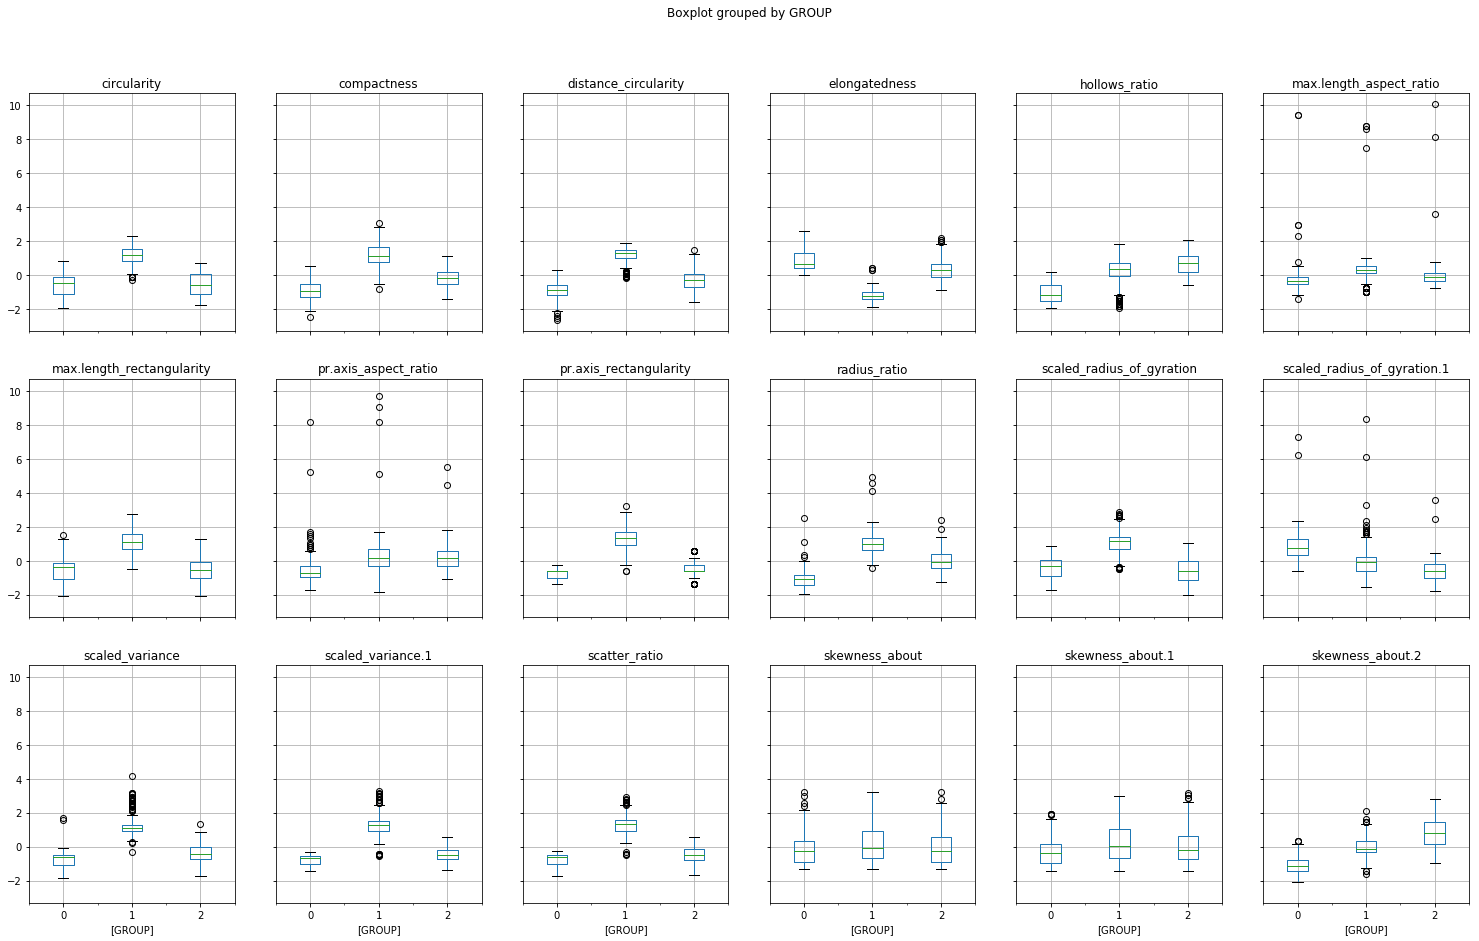

In [0]:
vhcl_df.boxplot(by = 'GROUP' , layout = (3,6) , figsize = (25,15))

In [0]:
## so here we see that based on some properties we are seeing that the 3 cluster are divided for every dimension .

# Let's move ahead and see it for k value ==4

vhcl_df.drop('GROUP',axis=1, inplace= True)



In [0]:
final_model = KMeans(4)
final_model.fit(vhclz_df)
prediction= final_model.predict(vhclz_df)
vhcl_df['GROUP']= prediction

print ("group assigned :\n")

vhcl_df[['hollows_ratio','class','GROUP']]
# Append the prediction in the main data frame  

group assigned :



hollows_ratio class  GROUP
0         0.183957   van      2
1         0.452977   van      2
2         0.049447   car      1
3         1.529056   van      2
4        -1.699181   bus      3
5        -1.699181   bus      1
6         1.125526   bus      2
7         0.856507   van      2
8         1.663566   van      2
9         1.125526   car      2
10        0.856507   van      2
11        0.856507   car      2
12       -0.085062   bus      2
13        0.183957   van      2
14        0.452977   bus      2
15       -0.219572   car      1
16       -1.430161   van      0
17        0.452977   bus      2
18       -0.085062   car      1
19       -0.354082   car      1
20       -0.488592   bus      0
21       -1.699181   van      0
22        1.394546   bus      2
23        0.452977   bus      2
24        0.721997   car      1
25        0.452977   van      2
26       -1.699181   car      0
27        0.452977   car      1
28       -0.354082   bus      1
29       -1.430161   car      0
..             ...   ...    ...
816      -0.085062   van      2
817       0.991016   car      1
818       0.183957   car      1
819       0.183957   car      2
820      -1.295651   car      0
821      -0.085062   car      1
822       1.529056   van      2
823       0.318467   car      1
824       0.049447   car      1
825      -0.757612   car      0
826       1.394546   car      2
827       0.318467   car      1
828      -0.623102   van      0
829      -0.623102   van      0
830       1.663566   bus      2
831       1.260036   bus      2
832       0.452977   car      1
833      -0.623102   car      2
834      -1.833690   car      0
835      -1.699181   bus      1
836       0.049447   van      0
837       0.452977   car      2
838       0.587487   van      2
839       0.991016   van      2
840       1.529056   car      2
841      -0.085062   car      2
842       0.183957   van      2
843       0.721997   car      1
844      -0.085062   car      2
845      -0.757612   van      0

[846 rows x 3 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f952e40bfd0>,
      dtype=object)

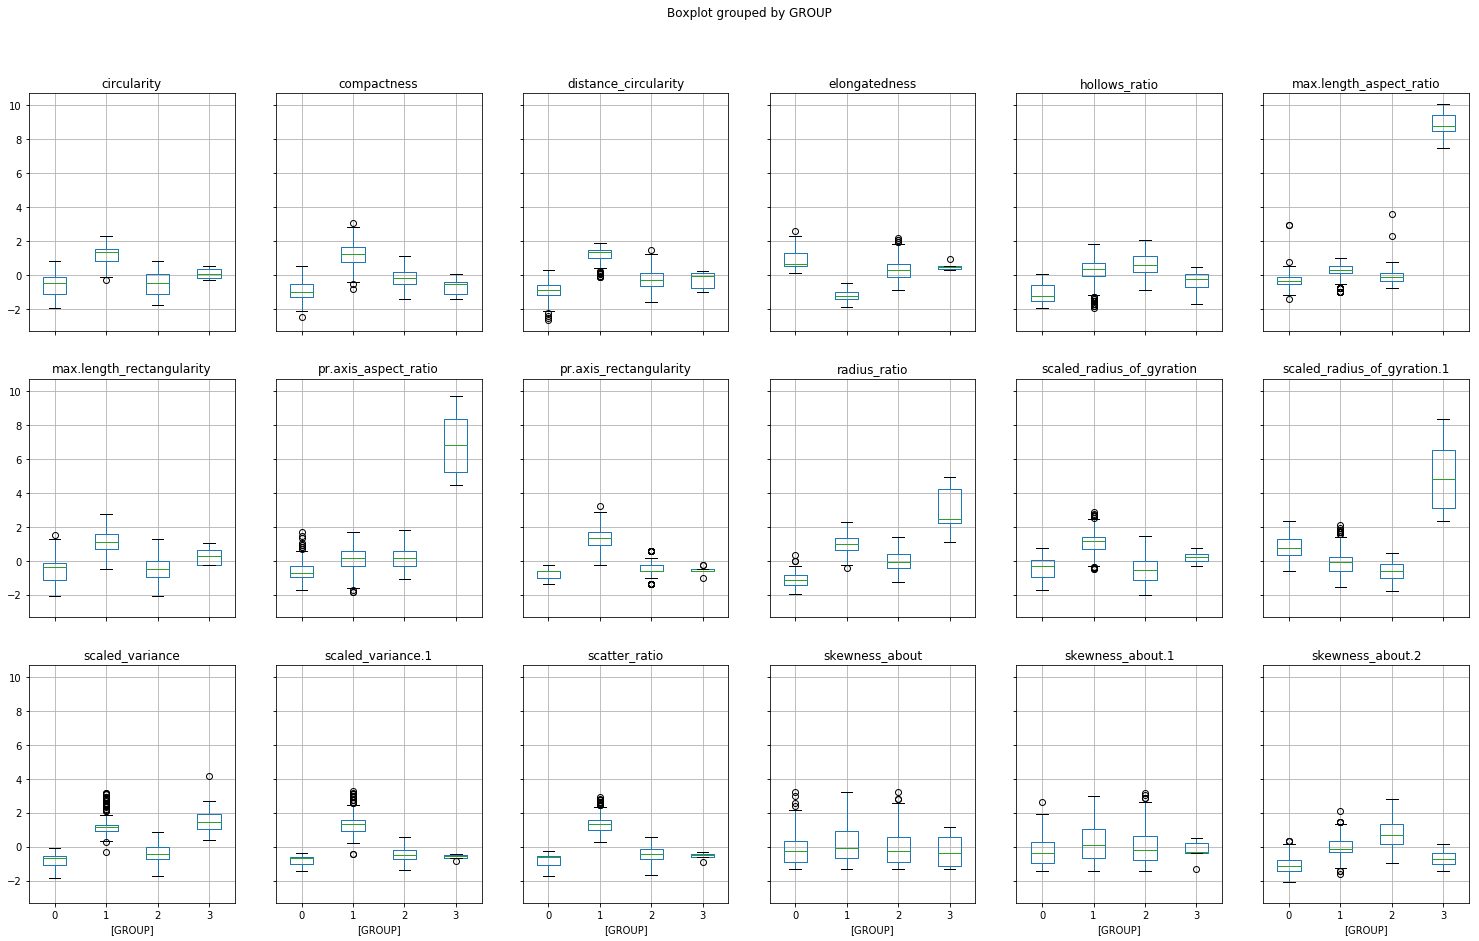

In [0]:
vhcl_df.boxplot(by = 'GROUP' , layout = (3,6) , figsize = (25,15))

In [0]:
# Usinfg the Value of k =4 Still makes our data not being nicely visualized in box plot rather we see in some cases there the value falling in the same
# range for all the 4 classes SO will go with k = 3value. 


In [0]:
#Moving to PCA 

 **Moving to PCA**



In [0]:
# IN PCA we will use Eigen values and Eigen vectors and based on the data covered by these we will skip the columns which are of less magnitude when it comes to
## have data captured 
## ALthough we will be dropping the principal component in this case rather than the columns themselves

## and then testing the accuracy for the same
vhclz_df.head()

compactness  circularity  ...  skewness_about.2  hollows_ratio
0     0.160580     0.518073  ...         -0.312012       0.183957
1    -0.325470    -0.623732  ...          0.013265       0.452977
2     1.254193     0.844303  ...         -0.149374       0.049447
3    -0.082445    -0.623732  ...          1.639649       1.529056
4    -1.054545    -0.134387  ...         -1.450481      -1.699181

[5 rows x 18 columns]

In [0]:
X_z = vhclz_df

In [0]:
cov_matrix = np.cov(X_z.T)
print('Covariance matrix \n%s',cov_matrix)

Covariance matrix 
%s [[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  0.64949139
   0.1038547

In [0]:
eigenvalues,eigenvectors = np.linalg.eig(cov_matrix)

print("\nEigen vectors \n%s ",eigenvectors)
print("\nEigen Values \n%s",eigenvalues)


Eigen vectors 
%s  [[ 2.75283688e-01  1.26953763e-01  1.19922479e-01 -7.83843562e-02
  -6.95178336e-02  1.44875476e-01  4.51862331e-01  5.66136785e-01
   4.84418105e-01  2.60076393e-01 -4.65342885e-02  1.20344026e-02
  -1.56136836e-01 -1.00728764e-02 -6.00532537e-03  6.00485194e-02
  -6.50956666e-02 -9.67780251e-03]
 [ 2.93258469e-01 -1.25576727e-01  2.48205467e-02 -1.87337408e-01
   8.50649539e-02 -3.02731148e-01 -2.49103387e-01  1.79851809e-01
   1.41569001e-02 -9.80779086e-02 -3.01323693e-03 -2.13635088e-01
  -1.50116709e-02 -9.15939674e-03  7.38059396e-02 -4.26993118e-01
  -2.61244802e-01 -5.97862837e-01]
 [ 3.04609128e-01  7.29516436e-02  5.60143254e-02  7.12008427e-02
  -4.06645651e-02 -1.38405773e-01  7.40350569e-02 -4.34748988e-01
   1.67572478e-01  2.05031597e-01 -7.06489498e-01  3.46330345e-04
   2.37111452e-01  6.94599696e-03 -2.50791236e-02  1.46240270e-01
   7.82651714e-02 -1.57257142e-01]
 [ 2.67606877e-01  1.89634378e-01 -2.75074211e-01  4.26053415e-02
   4.61473714e-02

In [0]:
eig_pairs  = [(eigenvalues[index],eigenvectors[:,index]) for index in range (len(eigenvalues))]
eig_pairs.sort()
eig_pairs.reverse()
print(eig_pairs)

## HEre we created a list called eig_pairs where we have various values within for eigen values and eigen vectors following that for that particular value

## and that is now sorted and reversed the eigen value and the eigen vectors tuploe with in our list.


[(9.404602609088712, array([ 0.27528369,  0.29325847,  0.30460913,  0.26760688,  0.08050399,
        0.09727569,  0.31709275, -0.31413315,  0.31395906,  0.2828309 ,
        0.30928036,  0.31378846,  0.27204749, -0.02081377,  0.04145551,
        0.05822502,  0.03027951,  0.07414539])), (3.0149220585246312, array([ 0.12695376, -0.12557673,  0.07295164,  0.18963438,  0.12217486,
       -0.01074829, -0.04811814, -0.01274985, -0.05993525, -0.11622053,
       -0.06228062, -0.05378436, -0.20923317, -0.48852515,  0.05508997,
        0.12408509,  0.54091477,  0.54035426])), (1.9035250218389657, array([ 0.11992248,  0.02482055,  0.05601433, -0.27507421, -0.64201297,
       -0.5918013 ,  0.09762831, -0.05764844,  0.10951242,  0.0170642 ,
       -0.05632398,  0.10884073,  0.03146365, -0.28627701,  0.11567935,
        0.07528289, -0.00873592, -0.03952427])), (1.1799374684450206, array([-0.07838436, -0.18733741,  0.07120084,  0.04260534, -0.03272571,
       -0.03141473,  0.09574857, -0.0822902 ,  0.

In [0]:
## Extract the descending order eien values and the eigen vectors 

eigenvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigenvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]



print('\n Eigenvalues in descending order \n %s' %eigenvalues_sorted)



 Eigenvalues in descending order 
 [9.404602609088712, 3.0149220585246312, 1.9035250218389657, 1.1799374684450206, 0.9172606328594378, 0.5399926288001129, 0.35887011792939744, 0.22193245599893402, 0.16060859663511767, 0.09185722339516159, 0.06649941176460192, 0.04660059944187703, 0.03579471891303863, 0.02741206573719489, 0.020579287070888228, 0.01791663143223666, 0.010025789847556175, 0.0029644574250446325]


In [0]:
tot = sum(eigenvalues)
var_explained = [(i/tot) for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_explained)

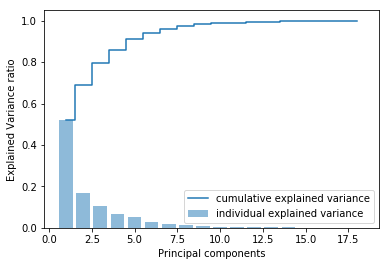

In [0]:
plt.bar(range(1,19),var_explained,alpha=0.5, align= 'center',label='individual explained variance')
plt.step(range(1,19),cum_var_exp,where= 'mid',label = 'cumulative explained variance')
plt.ylabel('Explained Variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [0]:
## Here we see that with in the 8 - 10 Principal components we are reaching the mark of BOVE 90 % . 

##cl_reduce = np.array(eigenvectors_sorted[0:10]) ## HEre we are reducing from 18 to 10 dimension 

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
sc = StandardScaler()

In [0]:
vhcls=pd.read_csv('vehicle_pca.csv')

In [0]:
vhcls_df = vhcls.drop('class',axis = 1)
vhcls_target = vhcls.pop('class')

In [0]:
vhcls_df.head()

compactness  circularity  ...  skewness_about.2  hollows_ratio
0           95         48.0  ...             187.0            197
1           91         41.0  ...             189.0            199
2          104         50.0  ...             188.0            196
3           93         41.0  ...             199.0            207
4           85         44.0  ...             180.0            183

[5 rows x 18 columns]

In [0]:
vhcl_std = sc.fit_transform(vhcls_df)

AttributeError: ignored

In [54]:
vhcl_std

array([[ 0.16058035,  0.515771  ,  0.05641152, ...,  0.38044029,
        -0.31200827,  0.18395733],
       [-0.32546965, -0.62271564,  0.1198274 , ...,  0.15649599,
         0.01308049,  0.45297703],
       [ 1.25419283,  0.84105289,  1.5149769 , ..., -0.40336477,
        -0.14946389,  0.04944748],
       ...,
       [ 1.49721783,  1.49161668,  1.19789747, ..., -0.96322552,
        -0.31200827,  0.72199673],
       [-0.93303214, -1.43592038, -0.26066791, ...,  1.38818965,
         0.17562488, -0.08506238],
       [-1.05454464, -1.43592038, -1.02165854, ...,  0.60438459,
        -0.47455265, -0.75761164]])

In [0]:
vhcl_reduce = np.array(eigenvectors_sorted[0:10])

vhcl_std_10d = np.dot(vhcl_std , vhcl_reduce.T)

project_vhcl= pd.DataFrame(vhcl_std_10d)

In [56]:
project_vhcl = project_vhcl.fillna(project_vhcl.median())

project_vhcl.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

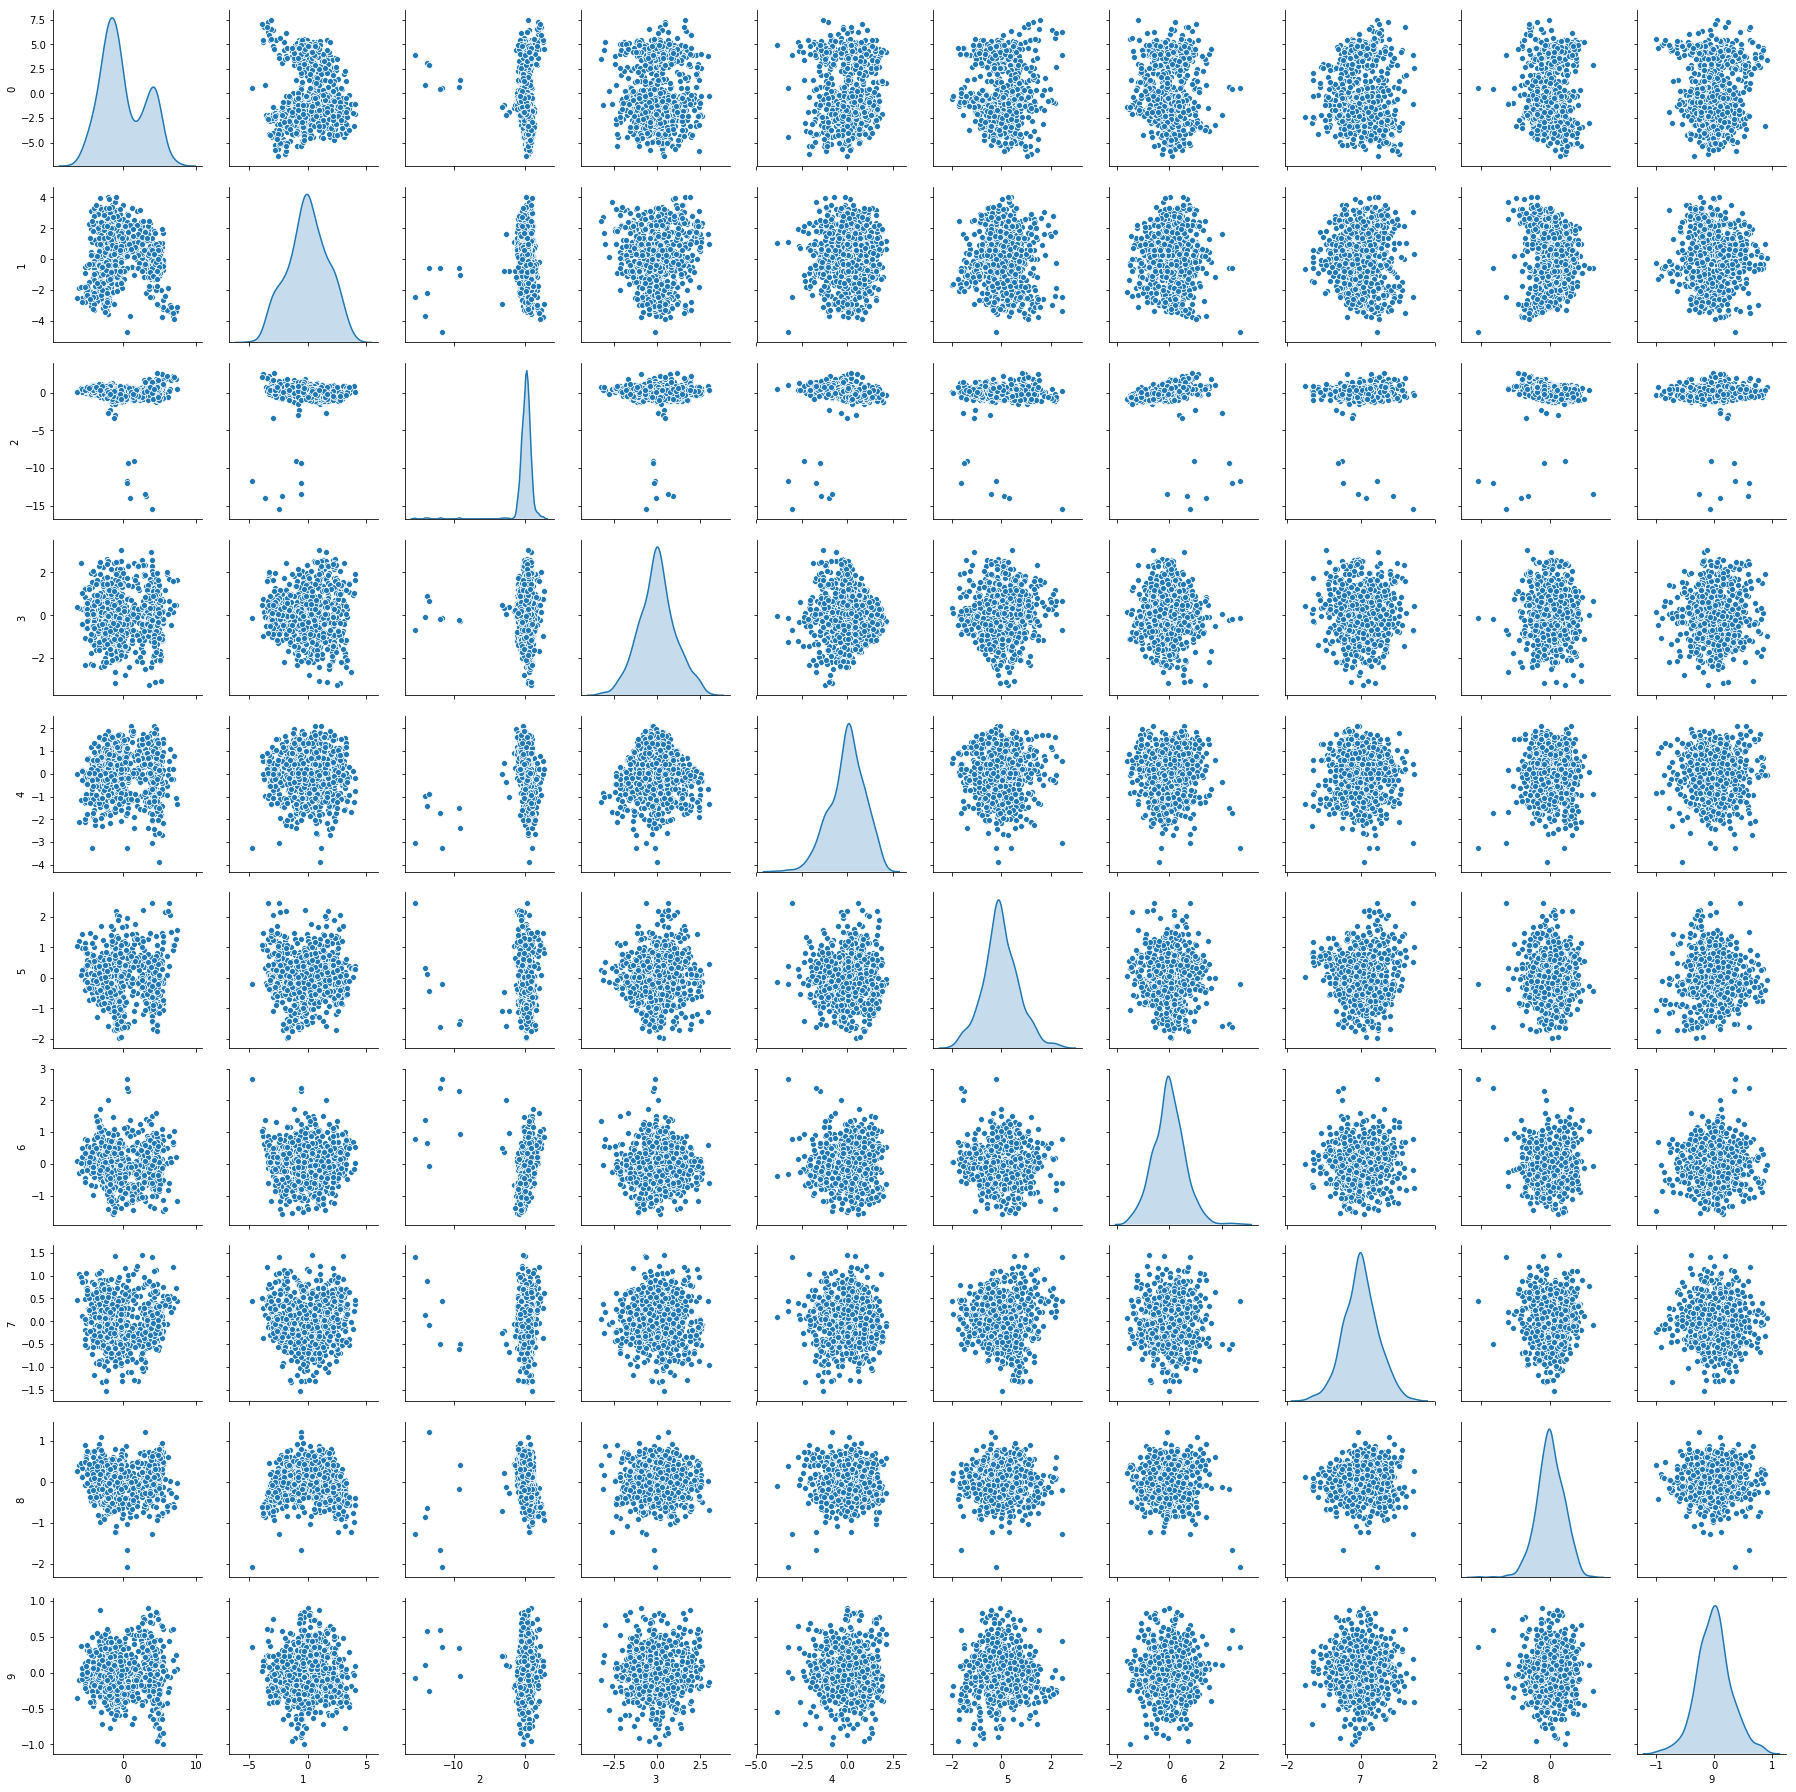

In [57]:
sns.pairplot(project_vhcl,diag_kind = 'kde')

In [0]:
#Final Moving towards model building :-- 

from sklearn import model_selection
test_size = 30
X_train, X_test, y_train, y_test = model_selection.train_test_split(project_vhcl, vhcl_target, test_size = 0.3, random_state = 45)
  

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

model = SVC()

In [60]:
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
vhcl_prediction = model.predict(X_test)

In [62]:


print(classification_report(y_test,vhcl_prediction))
print(confusion_matrix(y_test, vhcl_prediction))

## WE see that it gives a good accuracy score

              precision    recall  f1-score   support

         bus       0.99      0.90      0.94        77
         car       0.96      0.90      0.93       122
         van       0.79      1.00      0.88        55

    accuracy                           0.92       254
   macro avg       0.91      0.93      0.92       254
weighted avg       0.93      0.92      0.92       254

[[ 69   4   4]
 [  1 110  11]
 [  0   0  55]]


In [0]:
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}

In [0]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2,cv=5)

In [0]:
from sklearn.model_selection import GridSearchCV

In [67]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .................... C=1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .................... C=1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .................... C=1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:   48.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [68]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [0]:
grid_predict = grid.predict(X_test)

In [70]:
print(classification_report(y_test,grid_predict))
print(confusion_matrix(y_test,grid_predict))

              precision    recall  f1-score   support

         bus       0.99      0.90      0.94        77
         car       0.96      0.90      0.93       122
         van       0.79      1.00      0.88        55

    accuracy                           0.92       254
   macro avg       0.91      0.93      0.92       254
weighted avg       0.93      0.92      0.92       254

[[ 69   4   4]
 [  1 110  11]
 [  0   0  55]]


In [0]:
## HEre we see that we have reached a 91% of accuracy . 
